# Project 3 Testing.ipynb

In [28]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Testing Data
X_testing = np.load('flower_species_classification/data_test.npy').T
t_testing = np.load('flower_species_classification/labels_test.npy')

print(X_testing.shape, t_testing.shape)

(415, 270000) (415,)


In [29]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import learning_curve

In [30]:
X_test_rs = tf.constant(X_testing.reshape((X_testing.shape[0],300,300,3)), 
                         dtype=tf.float32)

X_test_rs.shape


TensorShape([415, 300, 300, 3])

In [23]:
model_mob = keras.models.load_model('model_mob.keras')
model_mob

## The best model found for the flowers dataset was a use of transfer learning using the MobileNet architecture with a mix of a custom MLP.

In [24]:
loss, accuracy = model_mob.evaluate(X_test_rs, t_testing, verbose=1)

print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy)


2024-04-24 16:02:22.112598: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


11/13 [========================>.....] - ETA: 0s - loss: 0.9463 - accuracy: 0.6847

2024-04-24 16:02:26.846726: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


13/13 [==============================] - 7s 19ms/step - loss: 0.9276 - accuracy: 0.6843
Testing Loss: 0.9275664687156677
Testing Accuracy: 0.6843373775482178


### Accuracy on the testing set is 68.4% and the loss is 0.927 which is not adequate for the goal of the model. This can be used to gather more higher-quality data for future models to learn class relationships more accurately. 

In [58]:
predictions = model_mob.predict(X_test_rs)
predictions

array([[4.82228190e-01, 1.35156233e-02, 3.02952856e-01, ...,
        1.16117546e-04, 1.15878098e-01, 5.12834787e-02],
       [1.27023114e-02, 9.63635385e-01, 1.55588565e-03, ...,
        7.71095743e-03, 1.87216661e-04, 2.01349918e-04],
       [2.08571972e-03, 5.31610749e-05, 8.76232609e-02, ...,
        8.76392733e-07, 3.90515288e-06, 4.78128642e-02],
       ...,
       [1.40536912e-02, 7.74997170e-06, 6.71969056e-01, ...,
        4.93879271e-10, 4.79995788e-06, 4.78260405e-03],
       [1.01965688e-01, 5.12769772e-03, 2.90658255e-03, ...,
        3.72112809e-05, 7.21938617e-04, 1.46878324e-03],
       [3.53068620e-01, 3.30794806e-04, 1.27646164e-03, ...,
        3.80352885e-02, 3.21022689e-01, 1.52602032e-01]], dtype=float32)

In [59]:
predictions.shape

(415, 10)

In [60]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

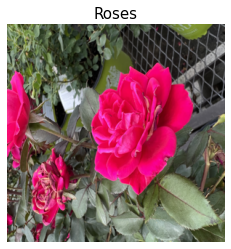

Predicted class: Roses


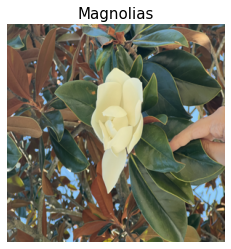

Predicted class: Magnolias


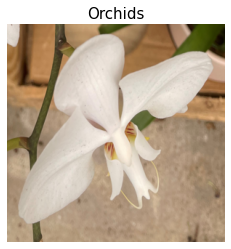

Predicted class: Orchids


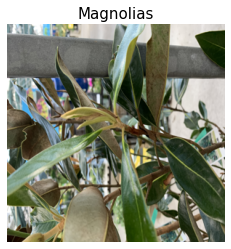

Predicted class: Firebush


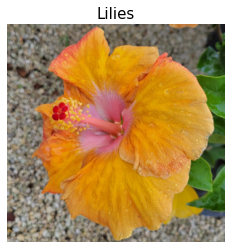

Predicted class: Hibiscus


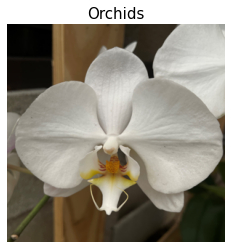

Predicted class: Orchids


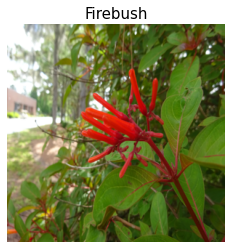

Predicted class: Firebush


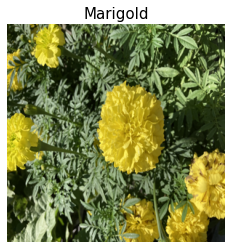

Predicted class: Marigold


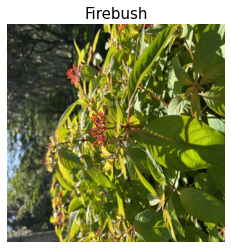

Predicted class: Firebush


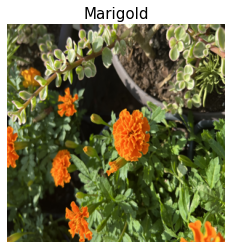

Predicted class: Marigold


In [61]:
predicted_classes = np.argmax(predictions[:10], axis=1)

# Use the class names list to get the actual class labels
class_labels = [class_names[i] for i in predicted_classes]



for i in range(0, 10):
    plt.imshow(X_testing[i].reshape((300,300,3)))
    plt.axis('off');plt.title(class_names[int(t_testing[i])],size=15)
    plt.show()
    print("Predicted class:", class_labels[i])


### Inspecting the images, some misclassifcations can be given its fault due to the image having low resemblence of the actual flower such as second Magnolia which has not bloomed yet and is therefore classified as Firebush.

## Misclassified Samples Only:

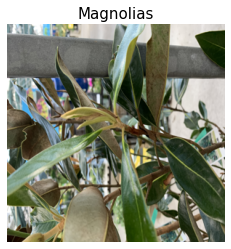

Predicted class (misclassified): Firebush


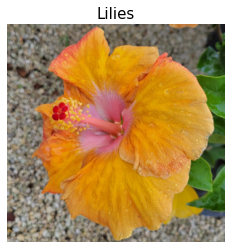

Predicted class (misclassified): Hibiscus


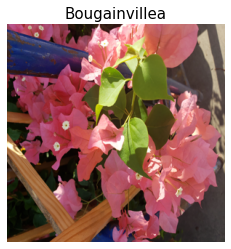

Predicted class (misclassified): Lilies


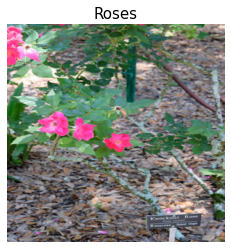

Predicted class (misclassified): Magnolias


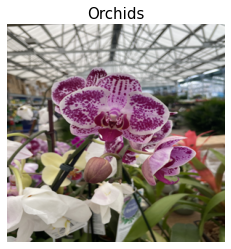

Predicted class (misclassified): Pentas


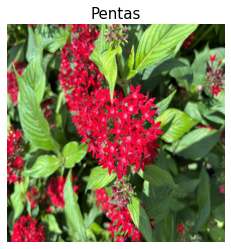

Predicted class (misclassified): Orchids


In [73]:
predicted_classes = np.argmax(predictions[:50], axis=1)

# Use the class names list to get the actual class labels
class_labels = [class_names[i] for i in predicted_classes]



for i in range(0, 20):
    if class_labels[i] != class_names[int(t_testing[i])]:
        plt.imshow(X_testing[i].reshape((300,300,3)))
        plt.axis('off');plt.title(class_names[int(t_testing[i])],size=15)
        plt.show()
        print("Predicted class (misclassified):", class_labels[i])



## Dataset 2: Lung Segmentation

In [75]:
data_test_lung = np.load('lung_segmentation/data_test.npy')
masks_test = np.load('lung_segmentation/masks_test.npy')

data_test_lung.shape, masks_test.shape

((138, 262144), (138, 262144))

In [76]:
# Reshape images (assuming grayscale with 1 channel)
data_test_lung_reshaped = data_test_lung.reshape(-1, 512, 512, 1)
# Normalize pixel intensities (optional, but recommended)
data_test_lung_reshaped = data_test_lung_reshaped / 255.0
# Convert masks to binary format (0 - background, 1 - lung)
masks_test_binary = masks_test > 0.5

In [77]:
masks_test_binary = masks_test_binary.reshape(138, 512, 512)

In [78]:
model_cnn = keras.models.load_model('model_cnn.keras')
model_cnn

In [80]:
loss, mse = model_cnn.evaluate(data_test_lung_reshaped, masks_test_binary, verbose=1)

print("Testing Loss:", loss)
print("Testing MSE:", mse)


5/5 [==============================] - 0s 32ms/step - loss: 1.4391 - mean_squared_error: 0.1594
Testing Loss: 1.439082145690918
Testing MSE: 0.15938301384449005


## For the test set, our convolutional nerual network resulted in a loss of 1.439 and a mean squared error (MSE) of 0.159.

## Let's visualize some results.

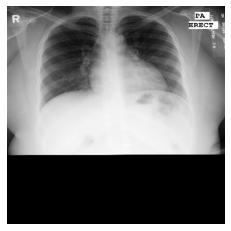

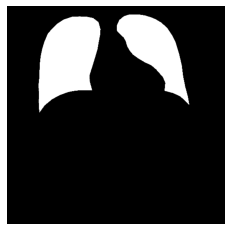

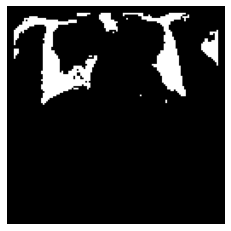

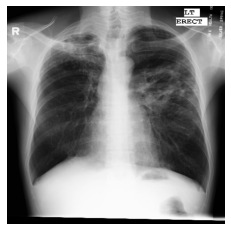

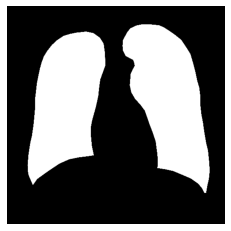

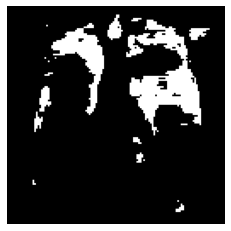

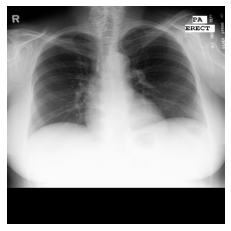

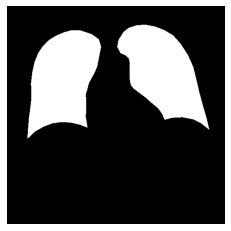

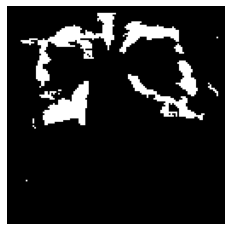

In [83]:
predicted_masks = model_cnn.predict(data_test_lung_reshaped[:5])
predicted_masks_reshaped = predicted_masks.reshape(-1, 512, 512)
threshold = 0.50  # Adjust threshold as needed
predicted_masks_binary = predicted_masks_reshaped > threshold
num_images = 3  # Number of sample images

for i in range(num_images):
    # Load original image, predicted mask, and ground truth mask
    plt.subplot(); plt.imshow(data_test_lung_reshaped[i].reshape(512,512), cmap='gray'); plt.axis('off')
    plt.show()
    plt.subplot(); plt.imshow(masks_test[i].reshape(512,512), cmap='gray'); plt.axis('off')
    plt.show()
    plt.subplot(); plt.imshow(predicted_masks_binary[i].reshape(512,512), cmap='gray'); plt.axis('off')
    plt.show()

## These poor results for segmentation on the test set suggest severe overfitting on our network due the difference of performance on training/validation set and the testing set.

## The next steps that should be taken can be adjusting the network architecture to result in more generalizable results via tweaking dropout rates, pooling/upsampling, and overall network complexity.